### Portfolio Break Down

In [1]:
import datetime
import pandas as pd
#pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco

### 輸入候補ETF資料

In [2]:
start = datetime.datetime(2015, 4, 1)
end = datetime.date.today()

new_tickers = ['IWY', 'JKE', 'VONG', 'IWF', 'SPYG', 'IVW', 'VOOG', 'IAU']

new_data = {}
for ticker in new_tickers:
    new_data[ticker] = pdr.get_data_yahoo(ticker, start, end)

new_p = DataFrame({tic: data['Adj Close'] for tic, data in new_data.items()})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 計算新增資料日報酬、標準差

In [3]:
new_ret = np.log(new_p / new_p.shift(1))
new_ret.head()

,IWY,JKE,VONG,IWF,SPYG,IVW,VOOG,IAU
Date,,,,,,,,
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,-0.004452,-0.005172,-0.005235,-0.003646,-0.005186,-0.004574,-0.005893,0.017316
2015-04-02,0.003679,0.005003,0.005629,0.003343,0.004171,0.002729,0.005011,-0.002578
2015-04-06,0.006742,0.006072,0.005304,0.006853,0.005569,0.005699,0.004791,0.011976
2015-04-07,-0.001729,-0.003116,-0.000882,-0.002313,-0.001415,-0.001312,-0.001953,-0.005115


In [4]:
new_vol = new_ret.rolling(252).std() * np.sqrt(252)

### 繪製新增ETF標準差、報酬分佈

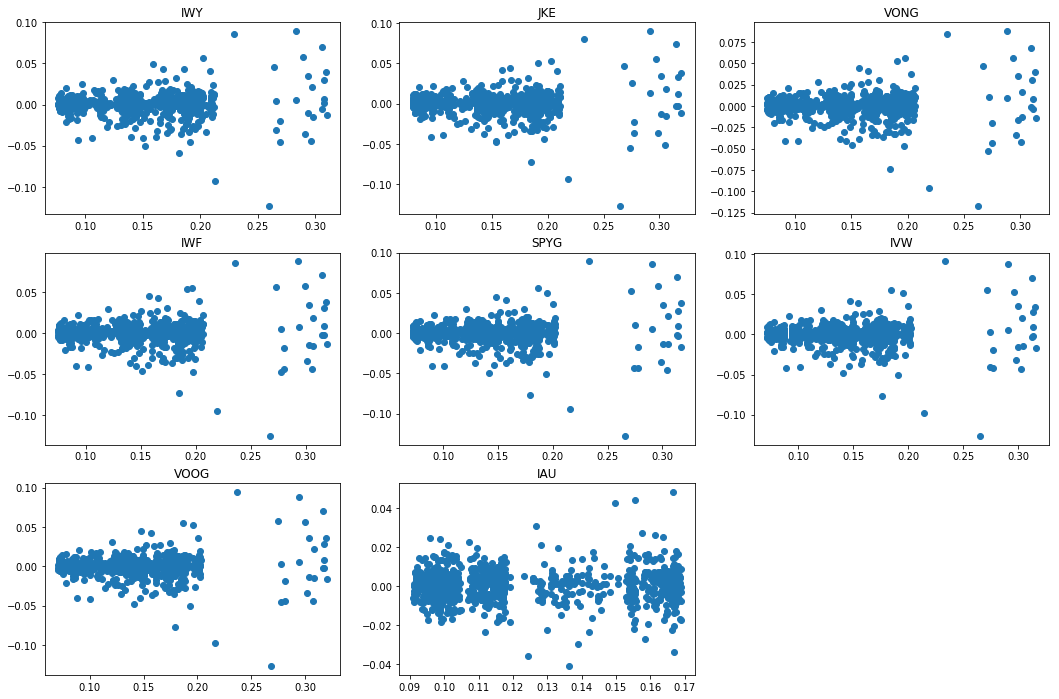

In [5]:
'IWY', 'JKE', 'VONG', 'IWF', 'SPYG', 'IVW', 'VOOG'
plt.figure(figsize = (18, 12))

plt.subplot(3, 3, 1) #nrow, ncol, index
plt.plot(new_vol['IWY'], new_ret['IWY'], 'o')
plt.title('IWY')

plt.subplot(3, 3, 2) #nrow, ncol, index
plt.plot(new_vol['JKE'], new_ret['JKE'], 'o')
plt.title('JKE')

plt.subplot(3, 3, 3) #nrow, ncol, index
plt.plot(new_vol['VONG'], new_ret['VONG'], 'o')
plt.title('VONG')

plt.subplot(3, 3, 4) #nrow, ncol, index
plt.plot(new_vol['IWF'], new_ret['IWF'], 'o')
plt.title('IWF')

plt.subplot(3, 3, 5) #nrow, ncol, index
plt.plot(new_vol['SPYG'], new_ret['SPYG'], 'o')
plt.title('SPYG')

plt.subplot(3, 3, 6) #nrow, ncol, index
plt.plot(new_vol['IVW'], new_ret['IVW'], 'o')
plt.title('IVW')

plt.subplot(3, 3, 7) #nrow, ncol, index
plt.plot(new_vol['VOOG'], new_ret['VOOG'], 'o')
plt.title('VOOG')

plt.subplot(3, 3, 8) #nrow, ncol, index
plt.plot(new_vol['IAU'], new_ret['IAU'], 'o')
plt.title('IAU')

plt.show()

### 將新增ETF加入原本投資組合並計算其報酬及風險

In [6]:
start = datetime.datetime(2015, 4, 1)
end = datetime.date.today()
tickers = ['IVE','VTI','VEA','VWO', 'IWS', 'IWN', 'SHV', 'VTIP', 'IUSB', 'LQD', 'BNDX', 'VWOB', 'MUB']

all_data = {}
for ticker in tickers:
    all_data[ticker] = pdr.get_data_yahoo(ticker, start, end)

price = DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
price['IWY'] = new_p['IWY']

price.head()

,IVE,VTI,VEA,VWO,IWS,IWN,SHV,VTIP,IUSB,LQD,BNDX,VWOB,MUB,IWY
Date,,,,,,,,,,,,,,
2015-03-31,81.945343,97.390610,34.281384,35.533504,67.267891,93.617088,104.539825,45.346844,45.074539,102.635757,47.938328,61.866901,98.075836,48.348412
2015-04-01,81.688614,97.209015,34.522369,36.011684,67.089142,93.780373,104.539825,45.440422,45.074112,102.930870,47.952518,62.228790,98.126472,48.133656
2015-04-02,81.971909,97.517754,34.780582,36.568111,67.401985,94.125061,104.530380,45.449783,44.968620,102.761749,47.863811,62.380577,97.975410,48.311066
2015-04-06,82.627052,98.189728,35.116238,37.011520,67.884613,94.578575,104.539825,45.562069,45.034550,102.897026,47.961384,62.612198,97.966499,48.637878
2015-04-07,82.361458,97.862808,35.116238,36.924583,67.446655,93.834793,104.539825,45.505928,45.069710,103.269104,47.925911,62.524330,98.082031,48.553837


In [8]:
log_ret = np.log(price / price.shift(1))
log_ret.head()

,IVE,VTI,VEA,VWO,IWS,IWN,SHV,VTIP,IUSB,LQD,BNDX,VWOB,MUB,IWY
Date,,,,,,,,,,,,,,
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,-0.003138,-0.001866,0.007005,0.013367,-0.002661,0.001743,0.00000,0.002061,-0.000009,0.002871,0.000296,0.005832,0.000516,-0.004452
2015-04-02,0.003462,0.003171,0.007452,0.015333,0.004652,0.003669,-0.00009,0.000206,-0.002343,-0.001644,-0.001852,0.002436,-0.001541,0.003679
2015-04-06,0.007961,0.006867,0.009604,0.012053,0.007135,0.004807,0.00009,0.002467,0.001465,0.001316,0.002036,0.003706,-0.000091,0.006742
2015-04-07,-0.003220,-0.003335,0.000000,-0.002352,-0.006472,-0.007895,0.00000,-0.001233,0.000780,0.003610,-0.000740,-0.001404,0.001179,-0.001729


In [9]:
log_ret.corr()

,IVE,VTI,VEA,VWO,IWS,IWN,SHV,VTIP,IUSB,LQD,BNDX,VWOB,MUB,IWY
IVE,1.000000,0.978058,0.888381,0.795947,0.969133,0.911519,-0.212446,0.249073,0.016067,0.183180,0.051400,0.546703,0.262121,0.908226
VTI,0.978058,1.000000,0.896532,0.815466,0.961161,0.910937,-0.206500,0.258619,0.039558,0.200317,0.074375,0.562057,0.267469,0.965243
VEA,0.888381,0.896532,1.000000,0.885876,0.883695,0.830692,-0.190161,0.310186,0.084326,0.229929,0.084168,0.620620,0.281149,0.845303
VWO,0.795947,0.815466,0.885876,1.000000,0.793548,0.742024,-0.160380,0.290514,0.060572,0.192359,0.096050,0.592256,0.248648,0.782241
IWS,0.969133,0.961161,0.883695,0.793548,1.000000,0.947546,-0.195683,0.312303,0.074992,0.240443,0.116588,0.616443,0.324134,0.873305
IWN,0.911519,0.910937,0.830692,0.742024,0.947546,1.000000,-0.232697,0.314387,0.036313,0.196716,0.067740,0.568867,0.276898,0.811906
SHV,-0.212446,-0.206500,-0.190161,-0.160380,-0.195683,-0.232697,1.000000,0.009313,0.111412,0.049181,0.057795,-0.095951,-0.008341,-0.178201
VTIP,0.249073,0.258619,0.310186,0.290514,0.312303,0.314387,0.009313,1.000000,0.442772,0.458467,0.377387,0.593638,0.422709,0.197925
IUSB,0.016067,0.039558,0.084326,0.060572,0.074992,0.036313,0.111412,0.442772,1.000000,0.796246,0.619663,0.483652,0.631935,0.030639
LQD,0.183180,0.200317,0.229929,0.192359,0.240443,0.196716,0.049181,0.458467,0.796246,1.000000,0.547246,0.575581,0.691007,0.177147


In [10]:
weights = np.random.random(len(price.columns))
weights /= np.sum(weights)

In [11]:
def statistics(weights):
    weights = np.array(weights)
    port_ret = np.sum(log_ret.mean()*weights) * 252
    port_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    
    return np.array([port_ret, port_vol, port_ret/port_vol])

def min_var(weights):
    return statistics(weights)[1]

In [12]:
noa = len(price.columns)
bnds = tuple((0,1) for x in range(noa))
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

opt_vol = sco.minimize(min_var, noa* [1./noa,], method= 'SLSQP', bounds = bnds, constraints = cons)

In [17]:
target_returns = np.linspace(0.0, 0.125, 50)
target_vol = []

cnt = 0
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    ret = sco.minimize(min_var, noa*[1./noa,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_vol.append(ret['fun'])
    cnt += 1
    print(cnt)
target_vol = np.array(target_vol)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


### 匯入原本投資組合資料（以利後面效率前緣改善的比較）

In [14]:
import import_ipynb

importing Jupyter notebook from EF_final.ipynb
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of

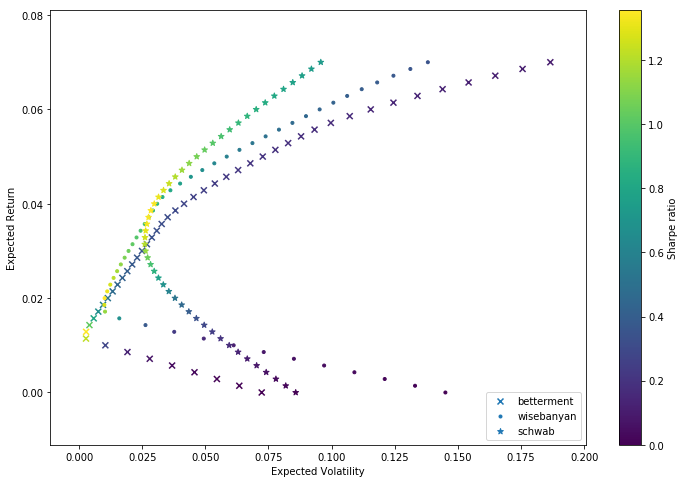

In [15]:
from EF_final import target_vol_bet,target_returns_bet

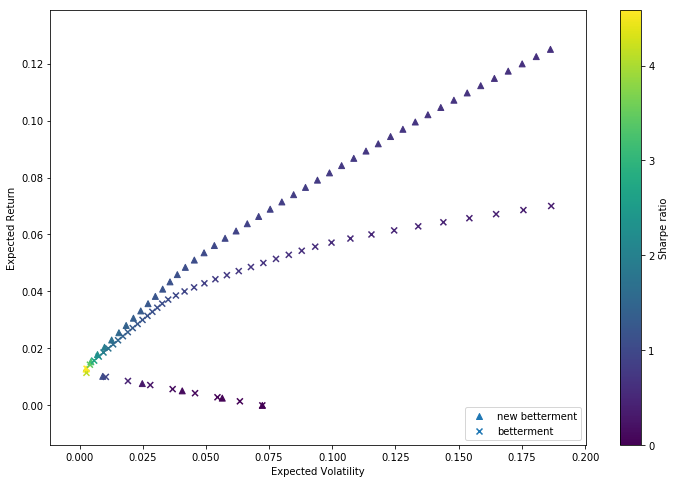

In [18]:
plt.figure(figsize=(12, 8))
plt.scatter(target_vol,target_returns, c = target_returns/target_vol, marker = '^', label = 'new betterment')
plt.scatter(target_vol_bet,target_returns_bet, c = target_returns_bet/target_vol_bet, marker = 'x', label = 'betterment')


#plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe ratio')
plt.legend(loc = 'lower right')

